      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


<AxesSubplot:xlabel='DIS'>

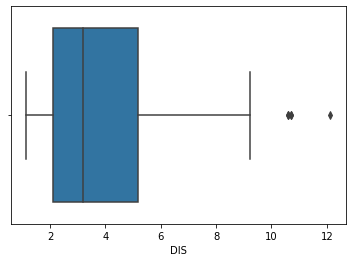

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler




from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
 
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
print(boston_df.head())
# import thư viện seaborn để vẽ biểu đồ
sns.boxplot(x=boston_df['DIS'])  # vẽ box plot cho dữ liệu ở cột DIS

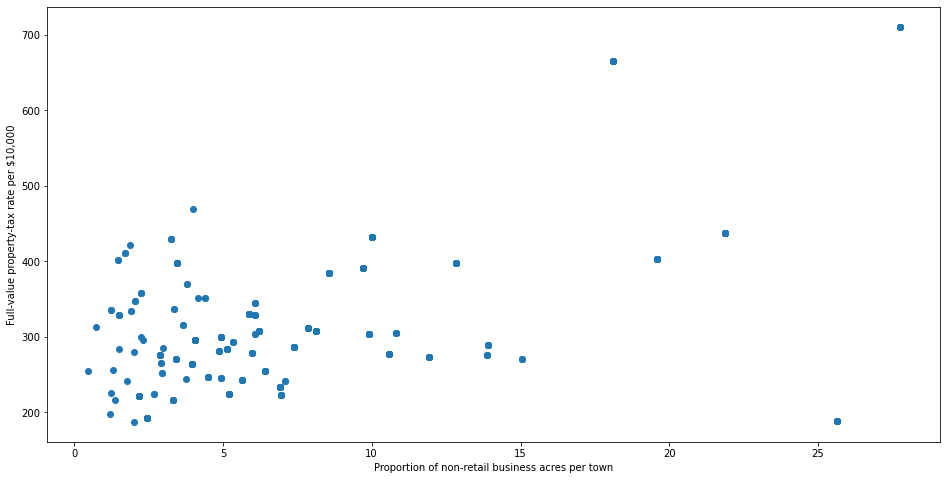

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [12]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)


         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    0.419782  0.284830  1.287909  0.272599  0.144217  0.413672  0.120013   
1    0.417339  0.487722  0.593381  0.272599  0.740262  0.194274  0.367166   
2    0.417342  0.487722  0.593381  0.272599  0.740262  1.282714  0.265812   
3    0.416750  0.487722  1.306878  0.272599  0.835284  1.016303  0.809889   
4    0.412482  0.487722  1.306878  0.272599  0.835284  1.228577  0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.272599  0.158124  0.439316  0.018673   
502  0.415249  0.487722  0.115738  0.272599  0.158124  0.234548  0.288933   
503  0.413447  0.487722  0.115738  0.272599  0.158124  0.984960  0.797449   
504  0.407764  0.487722  0.115738  0.272599  0.158124  0.725672  0.736996   
505  0.415000  0.487722  0.115738  0.272599  0.158124  0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
0    0.14

In [14]:
threshold = 3
print(np.where(z > threshold))
tg = z.iloc[55,1]
print(tg)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [16]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR)))

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64
      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  F

 Chuẩn hoá dữ liệu với Z-Score Scaling
 Scale dữ liệu về một phân bố chuẩn trong đó giá trị trung bình của các quan sát bằng 0 và độ lệch chuẩn = 1.
z = (x - u) / s
Trong đó:
• u là mean của dữ liệu huấn luyện
• s là độ lệch chuẩn
• x là điểm dữ liệu cần chuẩn hóa
• z là dữ liệu được chuẩn hóa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

AxesSubplot(0.125,0.125;0.775x0.755)


,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.034338,10.274018,9.905014,10.223019,0.069793
std,8.408078,10.549973,1.958530,9.745030,20.285263
min,15.155525,0.037619,3.654751,-20.140668,-31.124550
25%,45.657991,2.847595,8.571565,3.981450,-20.155880
50%,52.155019,7.443301,9.969133,10.344308,0.658358
75%,56.526328,14.187136,11.250639,16.715063,20.084239
max,59.991579,102.453264,15.687255,41.788276,30.658349


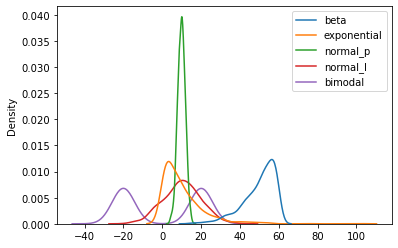

In [19]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
# hiển thị dữ liệu
df.head()
print(sns.kdeplot(data=df))
df.describe()

<AxesSubplot:ylabel='Density'>

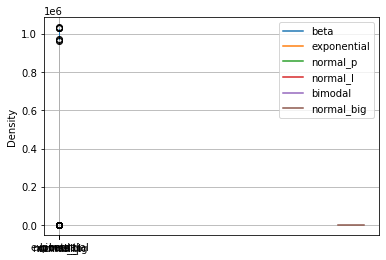

In [21]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)



<AxesSubplot:>

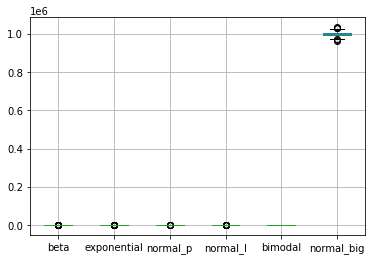

In [22]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.009504e-17,-8.437695e-18,-4.094503e-16,3.197442e-17,8.377743e-16,-7.333689e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.150326e+00,-9.707627e-01,-3.192900e+00,-3.117372e+00,-1.538553e+00,-3.855264e+00
25%,-5.207536e-01,-7.042804e-01,-6.811826e-01,-6.408079e-01,-9.975613e-01,-6.853752e-01
50%,2.523456e-01,-2.684493e-01,3.275480e-02,1.245246e-02,2.902895e-02,1.131893e-02
75%,7.724997e-01,3.710982e-01,6.874022e-01,6.665236e-01,9.871433e-01,6.387084e-01
max,1.184840e+00,8.741764e+00,2.953815e+00,3.240734e+00,1.508675e+00,3.423687e+00


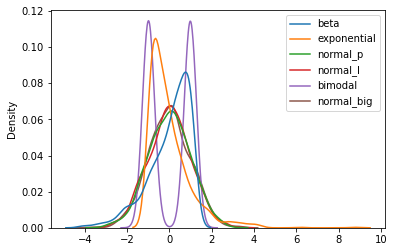

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)
#thog ke du lieu
df_s.describe()

<AxesSubplot:>

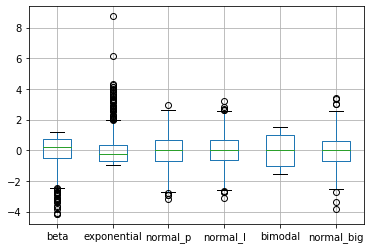

In [28]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()
